# Permanent magnet assembly B-field simulation

## Coil 1: based on Aditya & Jack's simulation
2 coil setup intended to emulate existing python simulation code

Results match up pretty well.

**Original python simulation: 8.821 G**

**This implementation: 8.647G**

**Nonuniformity graphs also agree**

- Inner radius = 33.3 mm
- Thickness = 2.4 mm
- Width = 5 mm
- Br = 1.09 T

Maximum B-field along +z direction: 11.998 G
Central B-field along +z axis: 8.647 G
Maximum B-field along +x direction: 8.647 G
Central B-field along +x axis: 8.647 G
Min transverse nonuniformity: 0.0
Max transverse nonuniformity:0.00015708365690597577
Min axial nonuniformity: 0.0
Max axial nonuniformity:0.03162187453327809


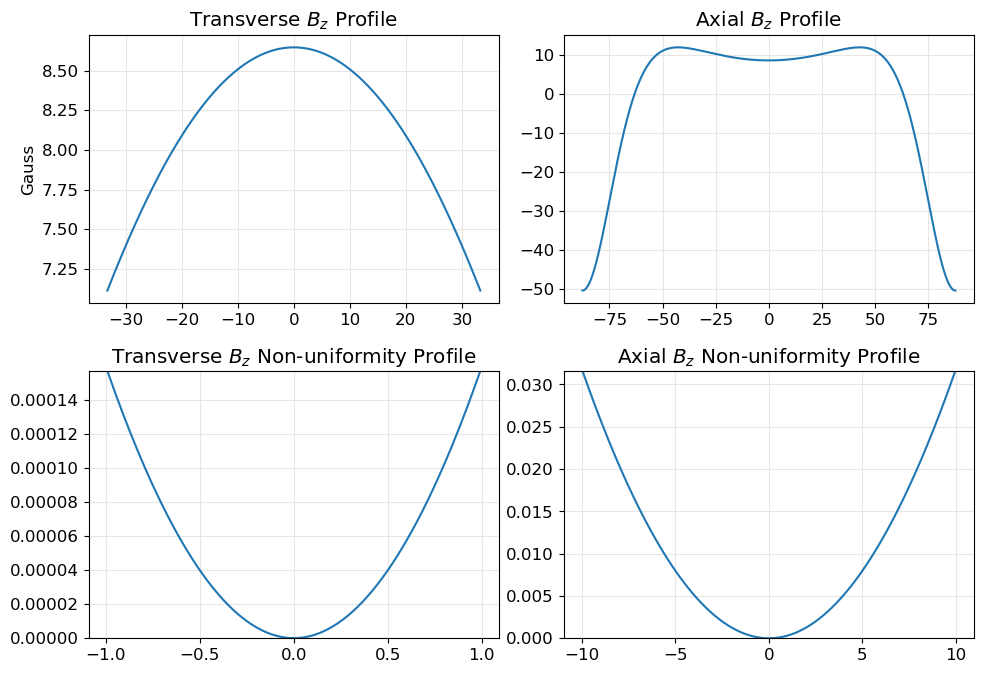

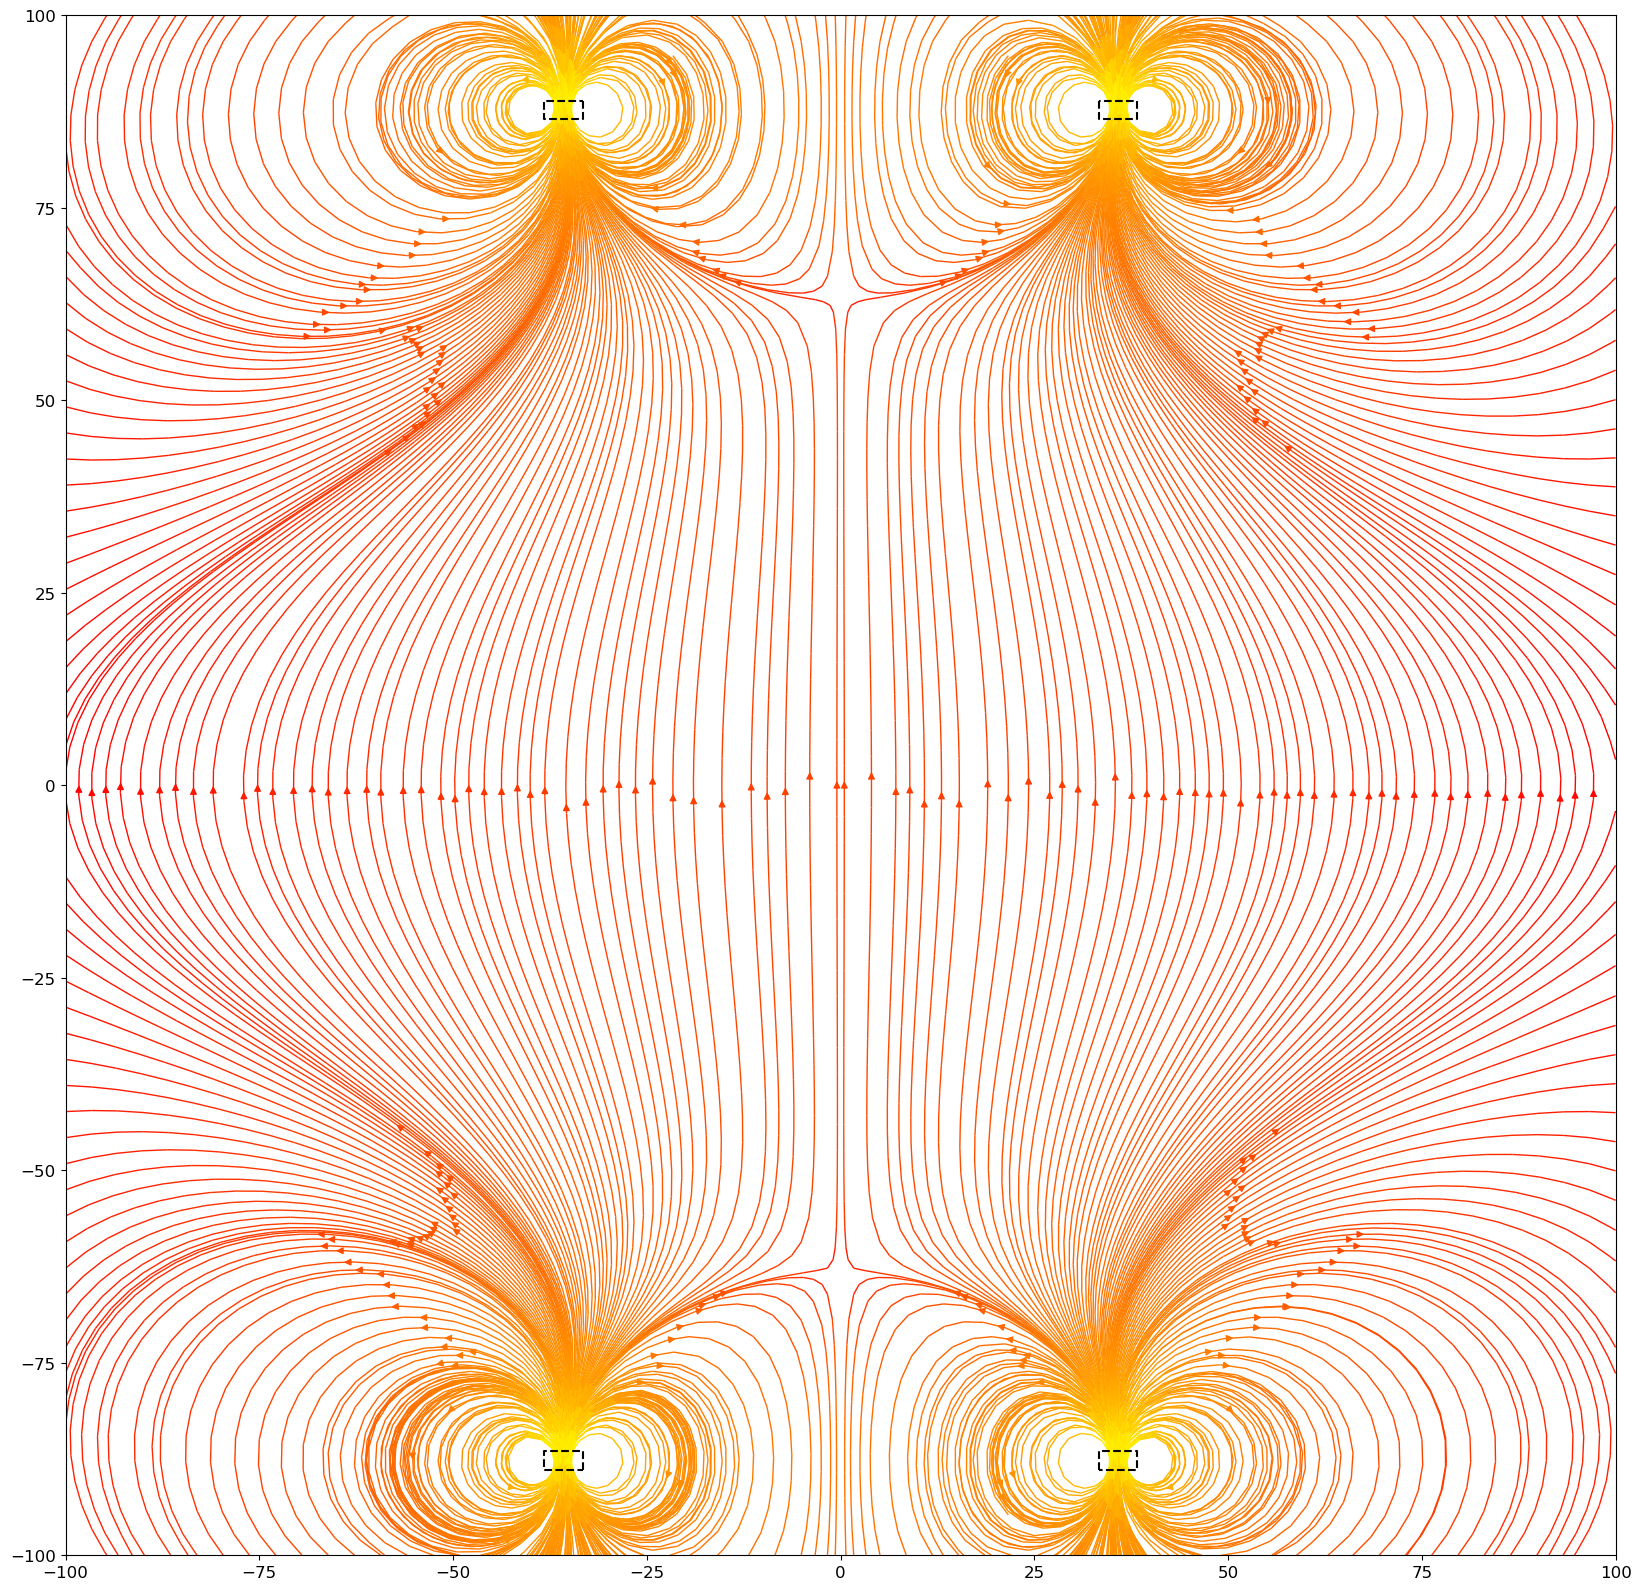

In [1]:
import numpy as np
from maghelper import get_field_on_axes, get_nonuniformity, make_flux_stream
import magpylib as magpy
from magpylib.magnet import CylinderSegment

thickness = 2.4
dist = 87.7
# dist = 20
innerrad = 33.3
width = 5
Br = 1.09
mT_to_T = 1e3
mT_to_G = 10
Br = Br * mT_to_T

coil1 = magpy.Collection()
ring = CylinderSegment(magnetization=(0,0,Br), dimension=(innerrad, innerrad+width,thickness,0,360), position = (0,0,+dist))
ring2 = CylinderSegment(magnetization=(0,0,Br), dimension=(innerrad, innerrad+width,thickness,0,360), position = (0,0,-dist))
coil1.add(ring).add(ring2)

get_field_on_axes(coil1, dist*2, innerrad*2, [-1,1], [-10,10])

x_bounds = [-100, 100]
z_bounds = [-100, 100]

outerrad = innerrad+width
nearsurface_z = dist - thickness/2
farsurface_z = dist + thickness/2
cross_section_coil1 = np.array([
    [[-innerrad,-innerrad,-outerrad,-outerrad,-innerrad], [farsurface_z,nearsurface_z,nearsurface_z,farsurface_z,farsurface_z]],
    [[innerrad,innerrad,outerrad,outerrad,innerrad], [farsurface_z,nearsurface_z,nearsurface_z,farsurface_z,farsurface_z]],
    [[-innerrad,-innerrad,-outerrad,-outerrad,-innerrad], [-farsurface_z,-nearsurface_z,-nearsurface_z,-farsurface_z,-farsurface_z]],
    [[innerrad,innerrad,outerrad,outerrad,innerrad], [-farsurface_z,-nearsurface_z,-nearsurface_z,-farsurface_z,-farsurface_z]]
])

make_flux_stream(coil1, x_bounds, z_bounds, cross_section_coil1)